In [57]:
import suspect
import numpy as np
from matplotlib import pyplot as plt
import subprocess

In [86]:
data = suspect.io.load_rda("/home/jovyan/data/lcmodel/lcmoel/dsvs27_2.rda")
wref = suspect.io.load_rda("/home/jovyan/data/lcmodel/lcmoel/dsvs27_water.rda")

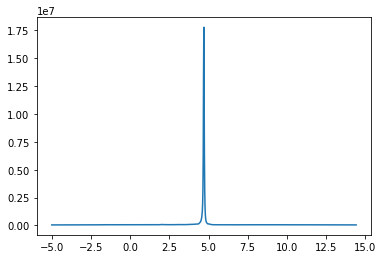

In [89]:
plt.plot(wref.frequency_axis_ppm(), wref.spectrum().real)
#WATER SUPPRESSION OFF

(4.0, 0.0)

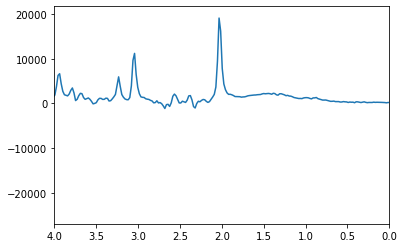

In [90]:
plt.plot(data.frequency_axis_ppm(), data.spectrum().real)
plt.xlim([4, 0])
#WATER SUPPRESSION ON

In [101]:
# create a parameters dictionary to set the basis set to use
params = {
    "FILBAS": "/home/jovyan/data/lcmodel/basis-sets/siemens-3t/3t_IU_MP_te68_748_ppm_inv.basis",
    "key": 210387309,
    "OWNER": "OpenMRSLab"
}
suspect.io.lcmodel.write_all_files("lcmodel_data/example.RAW", data=data, wref_data=wref, params=params)

In [102]:
myinput = open('./lcmodel_data/example_sl0.CONTROL')
result = subprocess.run("/home/jovyan/.lcmodel/bin/lcmodel",stdin=myinput,stdout=subprocess.PIPE)
subprocess.run(["ps2pdf","lcmodel_data/example.PS","lcmodel_data/example.PDF"])
print(result.stdout.decode())